# VLS Gratings

In [1]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo

## Generate Grating

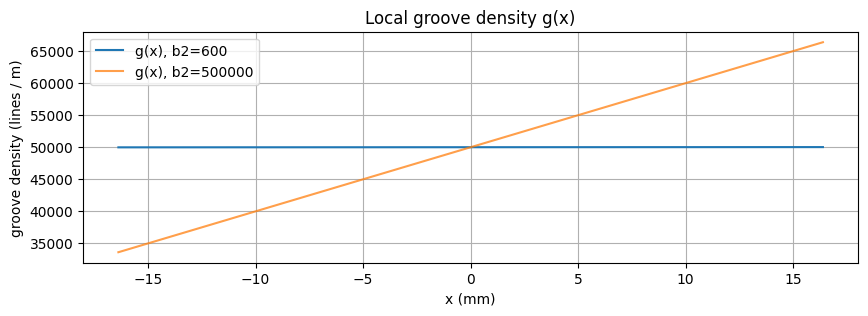

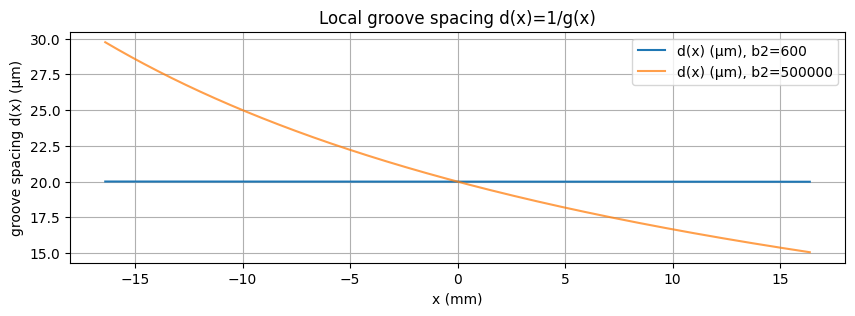

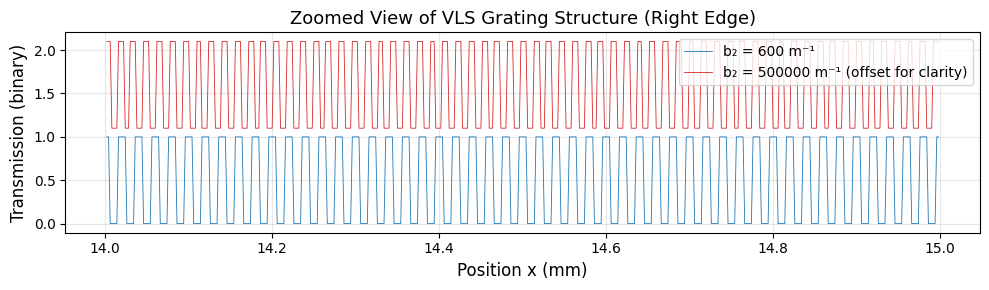

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo   # your package

# grid
N = 2**14
dx = 2e-6
x = fo.coords_1D(N, dx)     # meters

# parameters
g0 = 50e3        # lines / m
b2 = 600         # your original (small) value
b2_large = 5e5   # exaggerate for visualization
b3 = 0.0
b4 = 0.0

# continuous densities
g_small = g0 + 2*b2*x + 3*b3*x**2 + 4*b4*x**3
g_large = g0 + 2*b2_large*x

# local groove spacing
d_small = 1.0 / g_small
d_large = 1.0 / g_large

# plot continuous density and spacing over whole array
plt.figure(figsize=(10,3))
plt.plot(x*1e3, g_small, label=f"g(x), b2={b2:.0f}")
plt.plot(x*1e3, g_large, label=f"g(x), b2={b2_large:.0f}", alpha=0.75)
plt.xlabel("x (mm)")
plt.ylabel("groove density (lines / m)")
plt.title("Local groove density g(x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x*1e3, d_small*1e6, label=f"d(x) (µm), b2={b2:.0f}")
plt.plot(x*1e3, d_large*1e6, label=f"d(x) (µm), b2={b2_large:.0f}", alpha=0.75)
plt.xlabel("x (mm)")
plt.ylabel("groove spacing d(x) (µm)")
plt.title("Local groove spacing d(x)=1/g(x)")
plt.legend()
plt.grid(True)
plt.show()

# Generate binary gratings (small and large b2) and zoom to ends:
G_small = fo.vls_grating_1D(x, g0, b2=b2, b3=b3, b4=b4, threshold=0.5)
G_large = fo.vls_grating_1D(x, g0, b2=b2_large, b3=b3, b4=b4, threshold=0.5)

# --- Plot binary VLS grating comparison (zoomed, clean style) ---

# Choose one region to zoom (e.g., right edge)
zoom_min_mm, zoom_max_mm = 14.0, 15.0   # mm

# Convert to array indices
def mm_to_idx(x_mm):
    x_m = x * 1e3
    return np.searchsorted(x_m, x_mm)

i0 = mm_to_idx(zoom_min_mm)
i1 = mm_to_idx(zoom_max_mm)

# Create the figure
plt.figure(figsize=(10, 3))
plt.plot(x[i0:i1]*1e3, G_small[i0:i1], lw=0.6, color='C0', label=f'b₂ = {b2:.0f} m⁻¹')
plt.plot(x[i0:i1]*1e3, G_large[i0:i1] + 1.1, lw=0.6, color='C3',
         label=f'b₂ = {b2_large:.0f} m⁻¹ (offset for clarity)')

# Axis labels and title
plt.xlabel("Position x (mm)", fontsize=12)
plt.ylabel("Transmission (binary)", fontsize=12)
plt.title("Zoomed View of VLS Grating Structure (Right Edge)", fontsize=13)
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()